## Loading the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1 Read the data
train_data = pd.read_csv('data_train.csv')
test_data = pd.read_csv('data_test.csv')

In [3]:
train_data

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65
...,...,...,...,...,...,...,...,...,...,...
315,315,1,337,118,4,4.5,4.5,9.65,1,0.92
316,316,376,304,101,2,2.0,2.5,7.66,0,0.38
317,317,327,299,100,3,2.0,2.0,8.02,0,0.63
318,318,379,303,98,1,2.0,2.5,7.65,0,0.56


In [4]:
test_data

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0,328,295,101,2,2.5,2.0,7.86,0
1,1,325,315,104,3,3.0,2.5,8.33,0
2,2,191,324,111,5,4.5,4.0,9.16,1
3,3,49,321,110,3,3.5,5.0,8.85,1
4,4,180,307,102,3,3.0,3.0,8.27,0
...,...,...,...,...,...,...,...,...,...
75,75,138,316,100,2,1.5,3.0,8.16,1
76,76,65,325,111,3,3.0,3.5,8.70,0
77,77,125,301,106,4,2.5,3.0,8.47,0
78,78,60,311,104,2,2.0,2.0,8.30,0


In [5]:
train_data.columns

Index(['Unnamed: 0', 'Serial No.', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit '],
      dtype='object')

## (a) Data Preprocessing: Creating a binary label based on the column Chance of Admit. Converting any values greater than the median to 1 and 0 otherwise

In [6]:
median_chance_of_admit = train_data['Chance of Admit '].median()

In [7]:
train_data['Admission_Label'] = (train_data['Chance of Admit '] > median_chance_of_admit).astype(int)

In [8]:
train_data

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Label
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93,1
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49,0
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90,1
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68,0
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...,...
315,315,1,337,118,4,4.5,4.5,9.65,1,0.92,1
316,316,376,304,101,2,2.0,2.5,7.66,0,0.38,0
317,317,327,299,100,3,2.0,2.0,8.02,0,0.63,0
318,318,379,303,98,1,2.0,2.5,7.65,0,0.56,0


## (b) Model Initialization: Initilize 4 different SVM models

In [9]:
from sklearn.svm import SVC, LinearSVC
# 1. SVC with linear kernel
model_svc_linear = SVC(kernel='linear')

# 2. LinearSVC (linear kernel)
#model_linear_svc = LinearSVC()

# 2. SVC with RBF kernel
model_svc_rbf = SVC(kernel='rbf')

# 3. SVC with polynomial (degree 3) kernel
model_svc_poly = SVC(kernel='poly', degree=3)

In [10]:
train_data

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Label
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93,1
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49,0
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90,1
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68,0
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...,...
315,315,1,337,118,4,4.5,4.5,9.65,1,0.92,1
316,316,376,304,101,2,2.0,2.5,7.66,0,0.38,0
317,317,327,299,100,3,2.0,2.0,8.02,0,0.63,0
318,318,379,303,98,1,2.0,2.5,7.65,0,0.56,0


In [11]:
train_data.drop(columns = ['Unnamed: 0','Serial No.', 'Chance of Admit '], axis = 1, inplace = True)
test_data.drop(columns = ['Unnamed: 0','Serial No.'], axis = 1, inplace = True)

In [12]:
from sklearn.model_selection import train_test_split
X = train_data.drop('Admission_Label', axis=1)
y = train_data["Admission_Label"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,331,116,5,5.0,5.0,9.38,1
1,316,98,1,1.5,2.0,7.43,0
2,332,119,4,5.0,4.5,9.24,1
3,301,104,3,3.5,4.0,8.12,1
4,317,103,2,2.5,2.0,8.15,0
...,...,...,...,...,...,...,...
315,337,118,4,4.5,4.5,9.65,1
316,304,101,2,2.0,2.5,7.66,0
317,299,100,3,2.0,2.0,8.02,0
318,303,98,1,2.0,2.5,7.65,0


## (c) Feature Slection and Model Training; (f) Validation

In [14]:
from sklearn.metrics import accuracy_score
# Define the features for each feature combination
features_combinations = [
    ['CGPA', 'SOP'],
    ['CGPA', 'GRE Score'],
    ['SOP', 'LOR '],
    ['LOR ', 'GRE Score']
]

# Initialize variables to keep track of the best model and features
best_accuracy = 0
best_model = None
best_features = None

# Train and evaluateeach SVM model for each feature combination
for features in features_combinations:
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    
    # Standardize features
    #scaler = StandardScaler()
    #X_train_subset_scaled = scaler.fit_transform(X_train_subset)
    #X_val_subset_scaled = scaler.transform(X_val_subset)

    # Train the models
    model_svc_linear.fit(X_train_subset, y_train)
    model_svc_rbf.fit(X_train_subset, y_train)
    model_svc_poly.fit(X_train_subset, y_train) 

    # Evaluate the models
    accuracy_svc_linear = model_svc_linear.score(X_val_subset, y_val)
    accuracy_svc_rbf = model_svc_rbf.score(X_val_subset, y_val)
    accuracy_svc_poly = model_svc_poly.score(X_val_subset, y_val)

    print("Features:", features)
    print("Accuracy (SVM Linear Kernel):", accuracy_svc_linear)
    print("Accuracy (SVM RBF Kernel):", accuracy_svc_rbf)
    print("Accuracy (SVM Poly Kernel):", accuracy_svc_poly)
    print("\n")
    
    # Check if current model and features have higher accuracy
    if accuracy_svc_linear > best_accuracy:
        best_accuracy = accuracy_svc_linear
        best_model = model_svc_linear
        best_features = features

    if accuracy_svc_rbf > best_accuracy:
        best_accuracy = accuracy_svc_rbf
        best_model = model_svc_rbf
        best_features = features

    if accuracy_svc_poly > best_accuracy:
        best_accuracy = accuracy_svc_poly
        best_model = model_svc_poly
        best_features = features

# Print the best model and features
print("Best Model:", best_model.kernel)
print("Best Features:", best_features)
print("Best Accuracy:", best_accuracy)


Features: ['CGPA', 'SOP']
Accuracy (SVM Linear Kernel): 0.8125
Accuracy (SVM RBF Kernel): 0.828125
Accuracy (SVM Poly Kernel): 0.8125


Features: ['CGPA', 'GRE Score']
Accuracy (SVM Linear Kernel): 0.8125
Accuracy (SVM RBF Kernel): 0.765625
Accuracy (SVM Poly Kernel): 0.765625


Features: ['SOP', 'LOR ']
Accuracy (SVM Linear Kernel): 0.71875
Accuracy (SVM RBF Kernel): 0.75
Accuracy (SVM Poly Kernel): 0.765625


Features: ['LOR ', 'GRE Score']
Accuracy (SVM Linear Kernel): 0.8125
Accuracy (SVM RBF Kernel): 0.765625
Accuracy (SVM Poly Kernel): 0.765625


Best Model: rbf
Best Features: ['CGPA', 'SOP']
Best Accuracy: 0.828125


## (d) Support Vectors

In [15]:
# Support vectors
support_vectors_linear = model_svc_linear.support_vectors_
support_vectors_rbf = model_svc_rbf.support_vectors_
support_vectors_poly = model_svc_poly.support_vectors_

class1_support_vectors_linear = np.sum(model_svc_linear.n_support_[:1])
class2_support_vectors_linear = np.sum(model_svc_linear.n_support_[1:])
class1_support_vectors_rbf = np.sum(model_svc_rbf.n_support_[:1])
class2_support_vectors_rbf = np.sum(model_svc_rbf.n_support_[1:])
class1_support_vectors_poly = np.sum(model_svc_poly.n_support_[:1])
class2_support_vectors_poly = np.sum(model_svc_poly.n_support_[1:])

print("Features:", features)
print("Support Vectors (Linear Kernel):", support_vectors_linear)
print("Class 1 Support Vectors (Linear Kernel):", class1_support_vectors_linear)
print("Class 2 Support Vectors (Linear Kernel):", class2_support_vectors_linear)
print("Support Vectors (RBF Kernel):", support_vectors_rbf)
print("Class 1 Support Vectors (RBF Kernel):", class1_support_vectors_rbf)
print("Class 2 Support Vectors (RBF Kernel):", class2_support_vectors_rbf)
print("Support Vectors (Poly Kernel):", support_vectors_poly)
print("Class 1 Support Vectors (Poly Kernel):", class1_support_vectors_poly)
print("Class 2 Support Vectors (Poly Kernel):", class2_support_vectors_poly)
print("\n")

Features: ['LOR ', 'GRE Score']
Support Vectors (Linear Kernel): [[  3.  318. ]
 [  4.5 313. ]
 [  3.  320. ]
 [  3.5 316. ]
 [  4.  318. ]
 [  4.5 310. ]
 [  4.  308. ]
 [  3.  320. ]
 [  3.  327. ]
 [  3.  313. ]
 [  4.5 316. ]
 [  3.5 312. ]
 [  3.5 314. ]
 [  3.5 318. ]
 [  2.5 317. ]
 [  3.5 318. ]
 [  3.  313. ]
 [  3.5 314. ]
 [  3.  323. ]
 [  3.  319. ]
 [  4.  317. ]
 [  3.5 316. ]
 [  3.  314. ]
 [  3.  317. ]
 [  3.  322. ]
 [  2.5 319. ]
 [  3.5 316. ]
 [  4.  316. ]
 [  2.5 324. ]
 [  4.  312. ]
 [  4.  308. ]
 [  1.5 324. ]
 [  4.  314. ]
 [  3.5 309. ]
 [  3.  318. ]
 [  3.5 320. ]
 [  4.  310. ]
 [  3.5 327. ]
 [  4.  314. ]
 [  4.  329. ]
 [  4.  306. ]
 [  4.  308. ]
 [  3.  319. ]
 [  2.5 306. ]
 [  3.  324. ]
 [  4.  312. ]
 [  3.5 310. ]
 [  4.5 313. ]
 [  3.5 323. ]
 [  3.5 321. ]
 [  5.  308. ]
 [  3.5 323. ]
 [  3.5 319. ]
 [  2.5 325. ]
 [  3.  327. ]
 [  4.5 317. ]
 [  2.5 319. ]
 [  3.  325. ]
 [  2.5 315. ]
 [  3.  311. ]
 [  4.  309. ]
 [  3.  326. ]
 [  3

## (e) Result Visualization

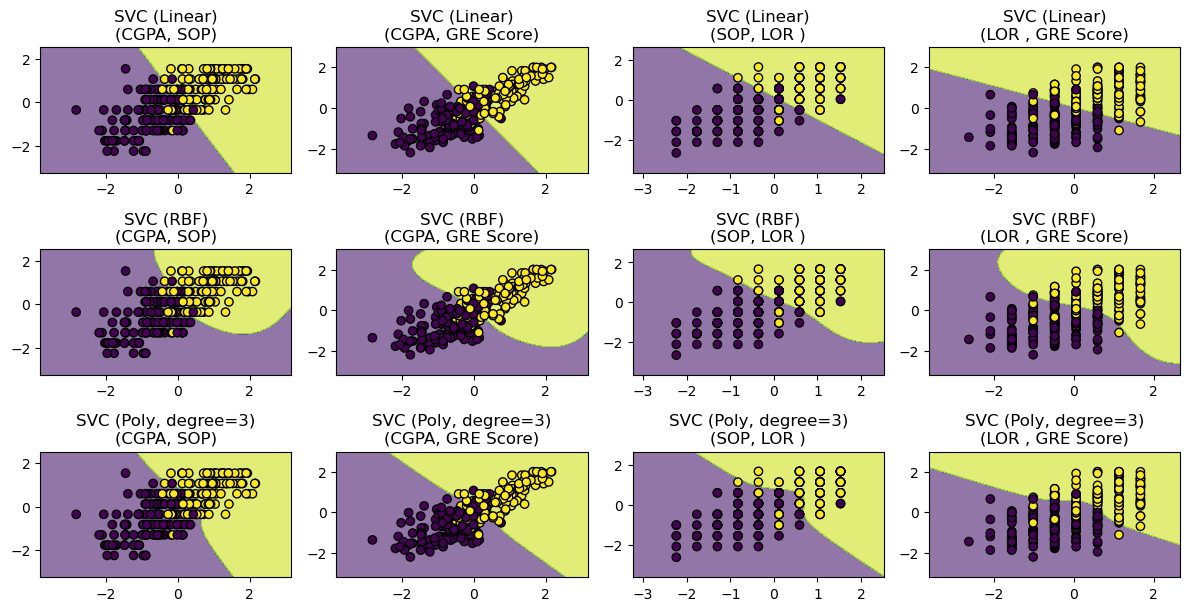

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Feature combinations
feature_combinations = [
    ['CGPA', 'SOP'],
    ['CGPA', 'GRE Score'],
    ['SOP', 'LOR '],
    ['LOR ', 'GRE Score']
]

# Create and train SVM models for each feature combination
svm_models = [
    ('SVC (Linear)', SVC(kernel='linear')),        # Linear kernel
    ('SVC (RBF)', SVC(kernel='rbf')),              # RBF kernel
    ('SVC (Poly, degree=3)', SVC(kernel='poly', degree=3))  # Polynomial kernel with degree 3
]

plt.figure(figsize=(12, 8))

for i, (model_name,model) in enumerate(svm_models):
    for j, features in enumerate(feature_combinations):
        plt.subplot(4, 4, i * 4 + j + 1)

        X_subset = X_train[features]
        scaler = StandardScaler()
        X_subset = scaler.fit_transform(X_subset)

        model.fit(X_subset, y_train)

        x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
        y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.6)
        plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_train, edgecolors='k')

        plt.title(f"{model_name}\n({features[0]}, {features[1]})")

plt.tight_layout()
plt.show()

## (f) Result Analysis

From the above plots of the feature combinations, plotted based on the models that we have used,
the feature combination of **"CGPA" and "SOP"** seems to give the best result on the **"SVM Linear Kernel"**

According to the accuracies of the models when validated on the validation dataset (performed near Section c), 
the feature combination of **"CGPA" and "SOP"** gives the best result on the **"SVM RBF Kernel"** with accuracy of 0.8281 which is slightly better than the accuracy of **"CGPA" and "SOP"** on the **"SVM Linear Kernel"** which has an accuracy of 0.8125

## (g) Inference

In [17]:
Features: ['CGPA', 'SOP']
test_data_subset = test_data[features]
#test_data_subset_scaled = scaler.fit_transform(test_data_subset)
test_predictions = model_svc_rbf.predict(test_data_subset)

In [18]:
# Save predictions to CSV
test_predictions_df = pd.DataFrame({'pred_svm': test_predictions})
test_predictions_df.to_csv("Apurva_Mandalika_preds.csv", index=False)